In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
data=pd.read_csv("titanic-passengers.csv",sep=";")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop(['Cabin'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

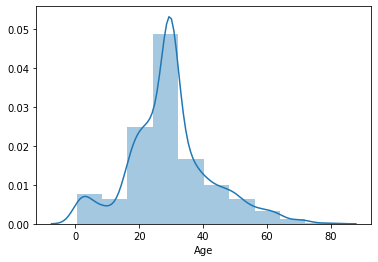

In [9]:
sns.distplot(data["Age"],bins=10,hist=True,kde=True)

In [19]:
data["Sex"]=data["Sex"].map({"female":1,"male":0})
data["Survived"]=data["Survived"].map({"Yes":1,"No":0})


In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=data[["Age", "Pclass","SibSp","Parch"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.70


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
confusion_matrix=pd.crosstab(logreg.predict(x),y)
print(confusion_matrix)

Survived    0    1
row_0             
0         473  193
1          76  149


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       189
           1       0.71      0.41      0.52       123

    accuracy                           0.70       312
   macro avg       0.70      0.65      0.65       312
weighted avg       0.70      0.70      0.68       312



In [24]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6762820512820513

In [25]:
y_train

519    0
887    0
282    0
312    0
428    1
      ..
440    0
165    0
7      1
219    0
326    1
Name: Survived, Length: 579, dtype: int64

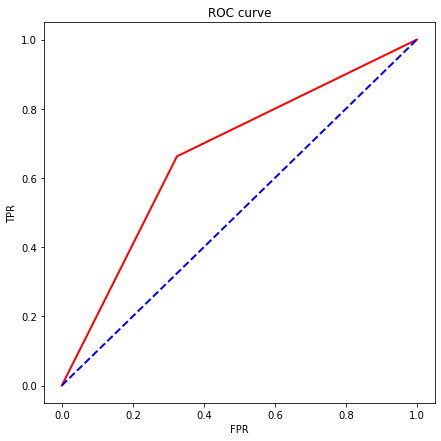

In [26]:
from sklearn import metrics

fpr, tpr,_=metrics.roc_curve(clf.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()